In [1]:
import os
import sys

file_dir = os.getcwd()
sys.path.append(file_dir + "/mlrose")

import importlib

import mlrose.mlrose_hiive as mlrose
from common import state_fitness_callback
import common


import mlrose_hiive as mlrose
import numpy as np
import itertools
import time

import matplotlib.pyplot as plt
import seaborn as sns

%config IPCompleter.greedy=True

RHC_ALGO="Random Hill Climb"
SA_ALGO="Simulated Annealing"
GA_ALGO="Genetic Algorithm"
MIMIC_ALGO="MIMIC Algorithm"

rhc_experiment_name = RHC_ALGO.replace(" ","_")
sa_experiment_name = SA_ALGO.replace(" ","_")
ga_experiment_name = GA_ALGO.replace(" ","_")
mimic_experiment_name = MIMIC_ALGO.replace(" ","_")

PROBLEM = "MaxKColor"
output_directory = "{}".format(PROBLEM)


In [8]:
# Tuning parameters based on results in notebook
rhc_restarts=30
rhc_max_attempts = 200
rhc_max_iters = 20000

sa_schedule = mlrose.ExpDecay(init_temp=100, exp_const=0.01)
sa_max_attempts = 200
sa_max_iters = 20000

# Good
ga_pop_size=1000
ga_mutation_prob=0.05
ga_max_attempts=20
ga_max_iters=10000

mimic_pop_size=1000
mimic_keep_pct=0.1
mimic_max_attempts=10
mimic_max_iters=10000

In [9]:
rhc_problem_size_results = {"problem_size":[], "best_fitness":[], "fitness_curve":[],
                           "max_iterations":[], "call_curve":[], "max_function_calls":[],
                           "time_curve":[], "max_time":[]}

sa_problem_size_results = {"problem_size":[], "best_fitness":[], "fitness_curve":[],
                           "max_iterations":[], "call_curve":[], "max_function_calls":[],
                           "time_curve":[], "max_time":[]}
ga_problem_size_results = {"problem_size":[], "best_fitness":[], "fitness_curve":[],
                           "max_iterations":[], "call_curve":[], "max_function_calls":[],
                           "time_curve":[], "max_time":[]}
mimic_problem_size_results = {"problem_size":[], "best_fitness":[], "fitness_curve":[],
                           "max_iterations":[], "call_curve":[], "max_function_calls":[],
                           "time_curve":[], "max_time":[]}

random_state=1
edges = [(0, 1), (0, 2), (0, 4), (1, 3), (2, 0), (2, 3), (3, 4)]
for n in range(10, 200, 20):
    edges = []
    for i in range(n):
        edge = (np.random.randint(0, n), np.random.randint(0, n))
        while edge in edges or edges[::-1] in edges or edge[0]==edge[1]:
            edge = (np.random.randint(0, n), np.random.randint(0, n))
        edges.append(edge)
    
    fitness = mlrose.MaxKColor(edges)
    problem = mlrose.DiscreteOpt(length=n, fitness_fn=fitness, maximize=True, max_val=2)
    problem.set_mimic_fast_mode(True)
    init_state = np.random.choice([0, 1], size=(n,))
    
    print("Running n = {}".format(n))
    print(RHC_ALGO)
    rhc_callback_user_info = {'timer': common.timer(), 'time_taken': []}
    rhc_best_state, rhc_best_fitness, rhc_curve, rhc_call_curve = mlrose.random_hill_climb(problem, restarts=rhc_restarts,
                                                          max_attempts = rhc_max_attempts, max_iters = rhc_max_iters,
                                                          init_state = init_state, curve=True,
                                                        state_fitness_callback=common.state_fitness_callback, callback_user_info=rhc_callback_user_info, random_state=random_state)
    rhc_problem_size_results["problem_size"].append(n)
    rhc_problem_size_results["best_fitness"].append(rhc_best_fitness)
    
    rhc_problem_size_results["fitness_curve"].append(rhc_curve)
    rhc_problem_size_results["max_iterations"].append(len(rhc_curve))
    
    rhc_problem_size_results["call_curve"].append(rhc_call_curve)
    rhc_problem_size_results["max_function_calls"].append(max(rhc_call_curve))
    
    rhc_problem_size_results["time_curve"].append(rhc_callback_user_info['time_taken'])
    rhc_problem_size_results["max_time"].append(max(rhc_callback_user_info['time_taken']))
                         
    print(SA_ALGO)
    sa_callback_user_info = {'timer': common.timer(), 'time_taken': []}
    sa_best_state, sa_best_fitness, sa_curve, sa_call_curve = mlrose.simulated_annealing(problem, schedule = sa_schedule,
                                                      max_attempts = sa_max_attempts, max_iters = sa_max_iters,
                                                      init_state = init_state, curve=True,
                                                    state_fitness_callback=state_fitness_callback, callback_user_info=sa_callback_user_info, random_state=random_state)
    sa_problem_size_results["problem_size"].append(n)
    sa_problem_size_results["best_fitness"].append(sa_best_fitness)
                                            
    sa_problem_size_results["fitness_curve"].append(sa_curve)
    sa_problem_size_results["max_iterations"].append(max(sa_curve))
    
    sa_problem_size_results["call_curve"].append(sa_call_curve)
    sa_problem_size_results["max_function_calls"].append(max(sa_call_curve))
    
    sa_problem_size_results["time_curve"].append(sa_callback_user_info['time_taken'])
    sa_problem_size_results["max_time"].append(max(sa_callback_user_info['time_taken']))
   
    print(GA_ALGO)
    ga_callback_user_info = {'timer': common.timer(), 'time_taken': []}
    ga_best_state, ga_best_fitness, ga_curve, ga_call_curve = mlrose.genetic_alg(problem, pop_size=ga_pop_size, mutation_prob=ga_mutation_prob,
                                                      max_attempts = ga_max_attempts, max_iters = ga_max_iters, curve=True,
                                                    state_fitness_callback=state_fitness_callback, callback_user_info=ga_callback_user_info, random_state=random_state)
    ga_problem_size_results["problem_size"].append(n)
    ga_problem_size_results["best_fitness"].append(ga_best_fitness)
                                           
    ga_problem_size_results["fitness_curve"].append(ga_curve)
    ga_problem_size_results["max_iterations"].append(max(ga_curve))

    ga_problem_size_results["call_curve"].append(ga_call_curve)
    ga_problem_size_results["max_function_calls"].append(max(ga_call_curve))

    ga_problem_size_results["time_curve"].append(ga_callback_user_info['time_taken'])
    ga_problem_size_results["max_time"].append(max(ga_callback_user_info['time_taken']))
                
    print(MIMIC_ALGO)
    mimic_callback_user_info = {'timer': common.timer(), 'time_taken': []}
    mimic_best_state, mimic_best_fitness, mimic_curve, mimic_call_curve =\
    mlrose.mimic(problem, pop_size=mimic_pop_size, keep_pct=mimic_keep_pct, max_attempts = mimic_max_attempts, max_iters = mimic_max_iters, curve=True,
                state_fitness_callback=state_fitness_callback, callback_user_info=mimic_callback_user_info, random_state=random_state)
    mimic_problem_size_results["problem_size"].append(n)
    mimic_problem_size_results["best_fitness"].append(mimic_best_fitness)
                                           
    mimic_problem_size_results["fitness_curve"].append(mimic_curve)
    mimic_problem_size_results["max_iterations"].append(max(mimic_curve))

    mimic_problem_size_results["call_curve"].append(mimic_call_curve)
    mimic_problem_size_results["max_function_calls"].append(max(mimic_call_curve))

    mimic_problem_size_results["time_curve"].append(mimic_callback_user_info['time_taken'])
    mimic_problem_size_results["max_time"].append(max(mimic_callback_user_info['time_taken']))

Running n = 10
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 30
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 50
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 70
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 90
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 110
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 130
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 150
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 170
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 190
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm


Random Hill Climb best fitness [7.0, 28.0, 46.0, 67.0, 80.0, 95.0, 114.0, 133.0, 149.0, 164.0]
Simulated Annealing best fitness [8.0, 27.0, 46.0, 64.0, 84.0, 105.0, 118.0, 143.0, 154.0, 187.0]
Genetic Algorithm best fitness [8.0, 28.0, 50.0, 70.0, 89.0, 110.0, 125.0, 150.0, 156.0, 187.0]
MIMIC Algorithm best fitness [8.0, 28.0, 50.0, 70.0, 89.0, 108.0, 121.0, 141.0, 160.0, 177.0]


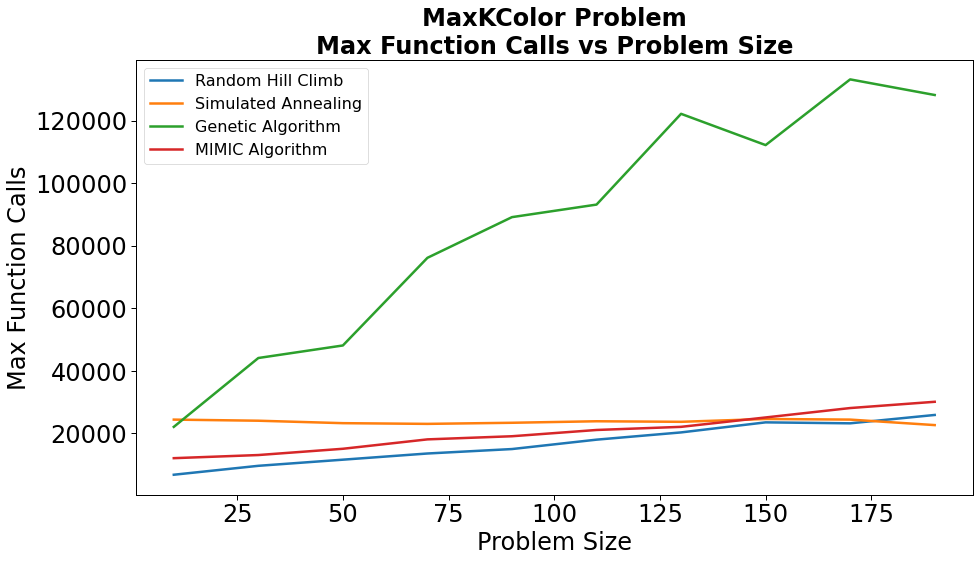

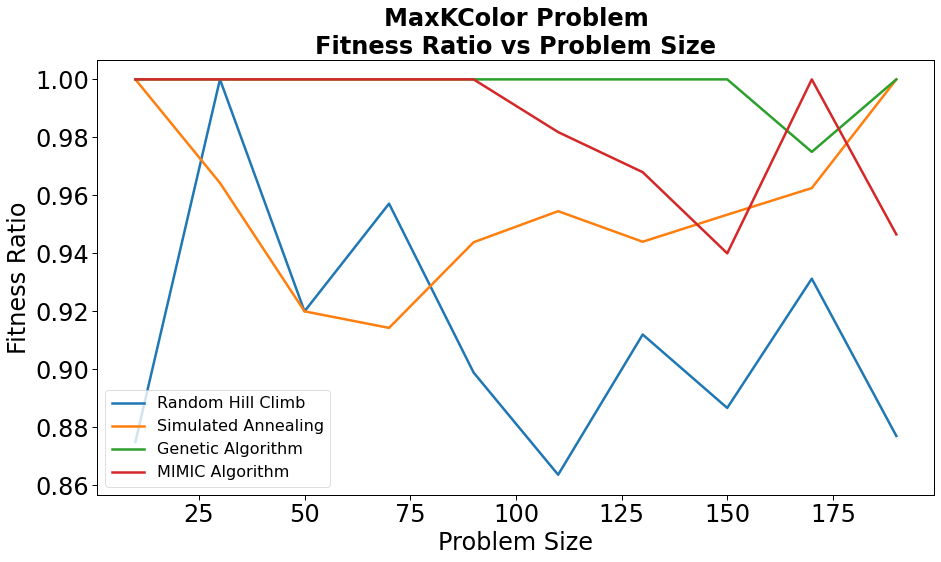

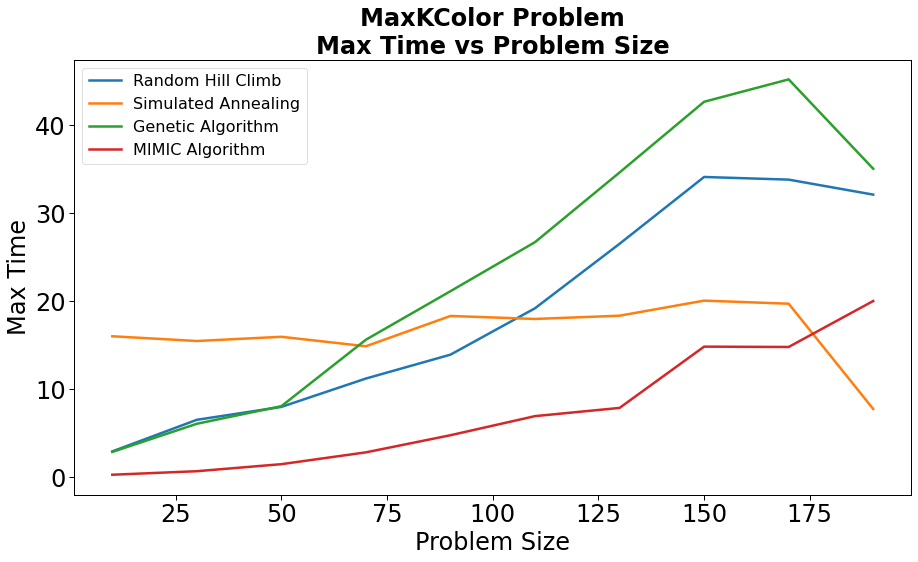

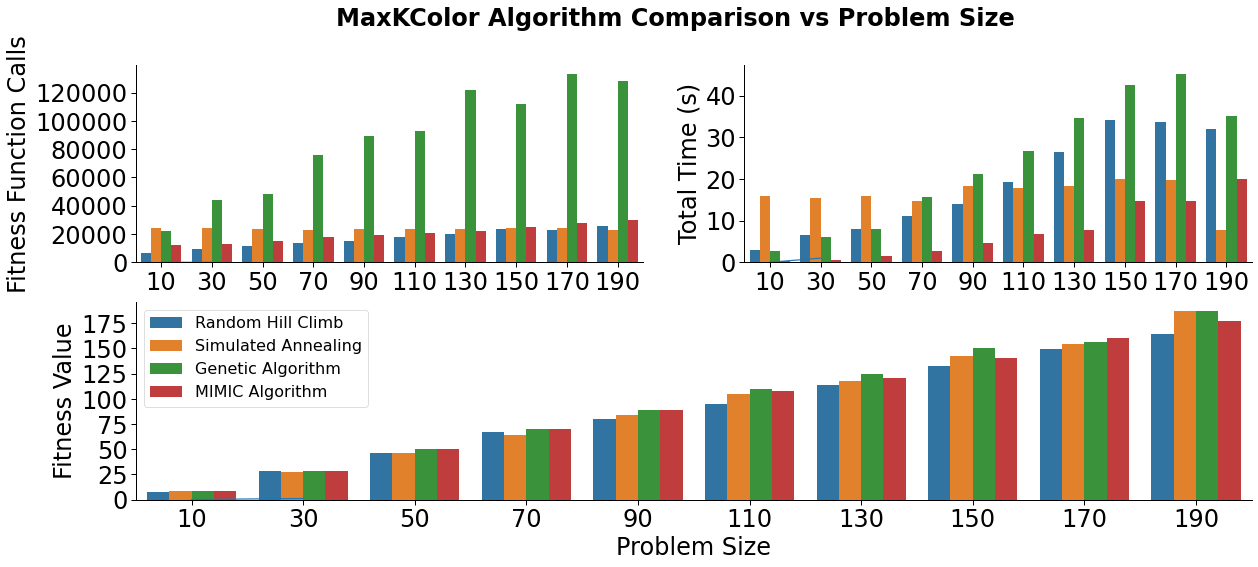

In [10]:
labels = [RHC_ALGO, SA_ALGO, GA_ALGO, MIMIC_ALGO]
results = [rhc_problem_size_results, sa_problem_size_results, ga_problem_size_results, mimic_problem_size_results]
all_fitness = [r['best_fitness'] for r in results]

for f,l in zip(all_fitness, labels):
    print("{} best fitness {}".format(l,f))

max_fitness = np.max(np.array(all_fitness), axis=0)

rhc_problem_size_results['fitness_ratio'] = [i / j for i, j in zip(rhc_problem_size_results["best_fitness"], max_fitness)]
sa_problem_size_results['fitness_ratio'] = [i / j for i, j in zip(sa_problem_size_results["best_fitness"], max_fitness)]
ga_problem_size_results['fitness_ratio'] = [i / j for i, j in zip(ga_problem_size_results["best_fitness"], max_fitness)]
mimic_problem_size_results['fitness_ratio'] = [i / j for i, j in zip(mimic_problem_size_results["best_fitness"], max_fitness)]

results = [rhc_problem_size_results, sa_problem_size_results, ga_problem_size_results, mimic_problem_size_results]

importlib.reload(common)
common.plot_vs_problem_size(results, labels, PROBLEM, y="max_function_calls")

importlib.reload(common)
common.plot_vs_problem_size(results, labels, PROBLEM, y="fitness_ratio")

importlib.reload(common)
common.plot_vs_problem_size(results, labels, PROBLEM, y="max_time")

common.plot_vs_problem_size_three(results, labels, PROBLEM)

Random Hill Climb best fitness = 67.0
Simulated Annealing best fitness = 64.0
Genetic Algorithm best fitness = 70.0
MIMIC Algorithm best fitness = 70.0
Random Hill Climb  Max Iterations =   =  12931  Max  fitness_curve  =  67.0
Simulated Annealing  Max Iterations =   =  20000  Max  fitness_curve  =  64.0
Genetic Algorithm  Max Iterations =   =  75  Max  fitness_curve  =  70.0
MIMIC Algorithm  Max Iterations =   =  17  Max  fitness_curve  =  70.0


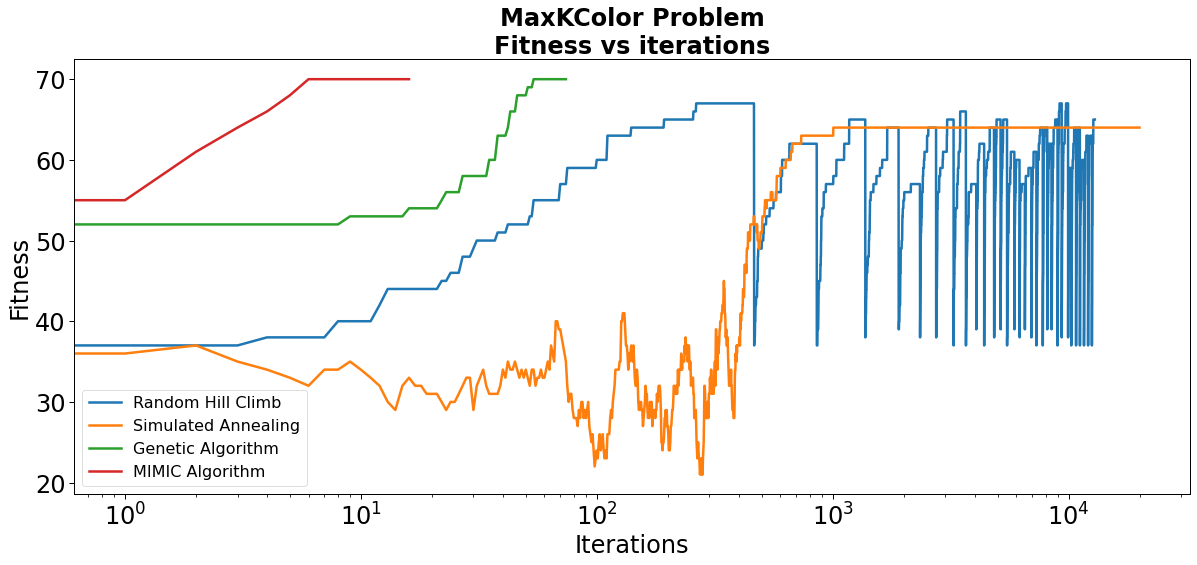

Random Hill Climb  max  call_curve  =  13507  max  fitness_curve  =  67.0
Simulated Annealing  max  call_curve  =  22982  max  fitness_curve  =  64.0
Genetic Algorithm  max  call_curve  =  76089  max  fitness_curve  =  70.0
MIMIC Algorithm  max  call_curve  =  18024  max  fitness_curve  =  70.0


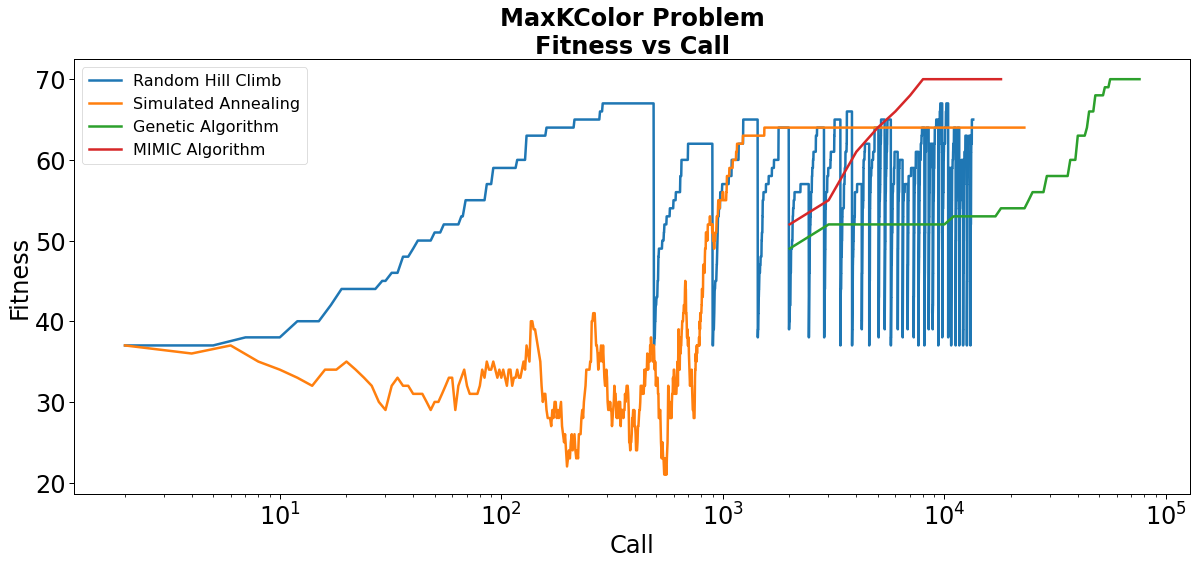

Random Hill Climb  max  time_curve  =  11.16273307800293  max  fitness_curve  =  67.0
Simulated Annealing  max  time_curve  =  14.833770513534546  max  fitness_curve  =  64.0
Genetic Algorithm  max  time_curve  =  15.57978081703186  max  fitness_curve  =  70.0
MIMIC Algorithm  max  time_curve  =  2.763503074645996  max  fitness_curve  =  70.0


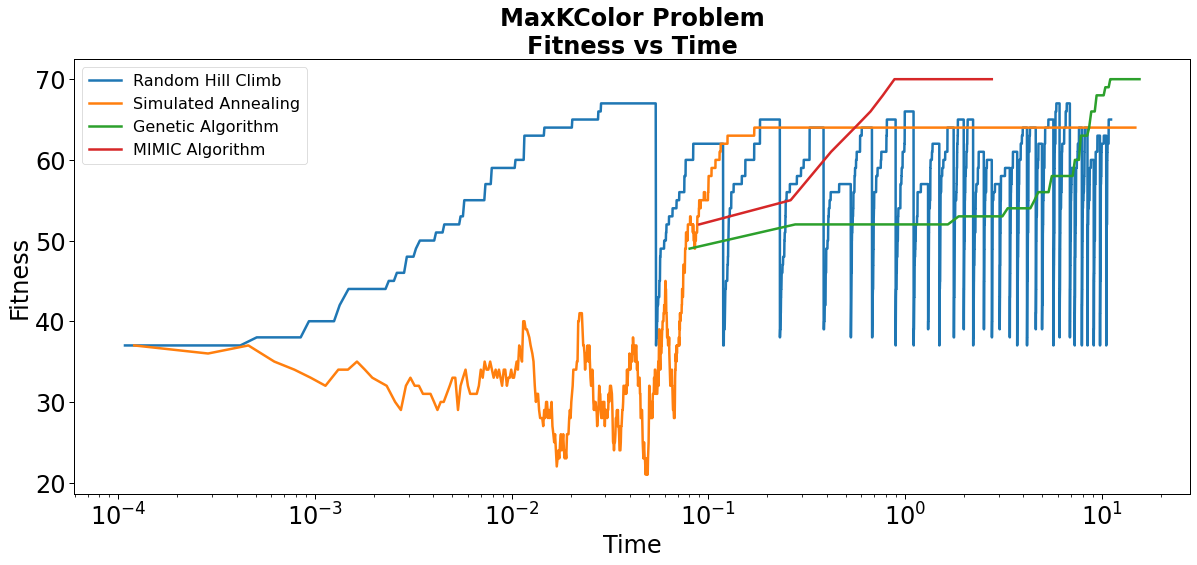

Random Hill Climb  Max Iterations =  12931  Max Fitness fitness_curve  =  67.0  Max  call_curve  =  13507
Simulated Annealing  Max Iterations =  20000  Max Fitness fitness_curve  =  64.0  Max  call_curve  =  22982
Genetic Algorithm  Max Iterations =  75  Max Fitness fitness_curve  =  70.0  Max  call_curve  =  76089
MIMIC Algorithm  Max Iterations =  17  Max Fitness fitness_curve  =  70.0  Max  call_curve  =  18024


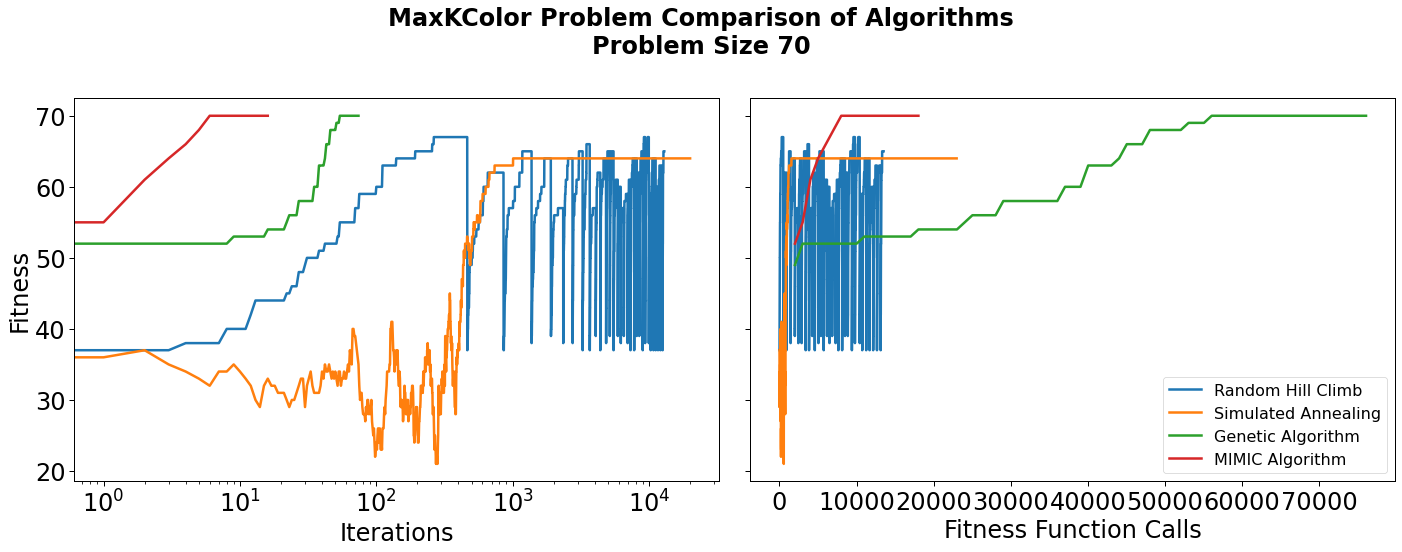

Random Hill Climb  Max Iterations =  12931  Max Fitness fitness_curve  =  67.0  Max  time_curve  =  11.16273307800293
Simulated Annealing  Max Iterations =  20000  Max Fitness fitness_curve  =  64.0  Max  time_curve  =  14.833770513534546
Genetic Algorithm  Max Iterations =  75  Max Fitness fitness_curve  =  70.0  Max  time_curve  =  15.57978081703186
MIMIC Algorithm  Max Iterations =  17  Max Fitness fitness_curve  =  70.0  Max  time_curve  =  2.763503074645996


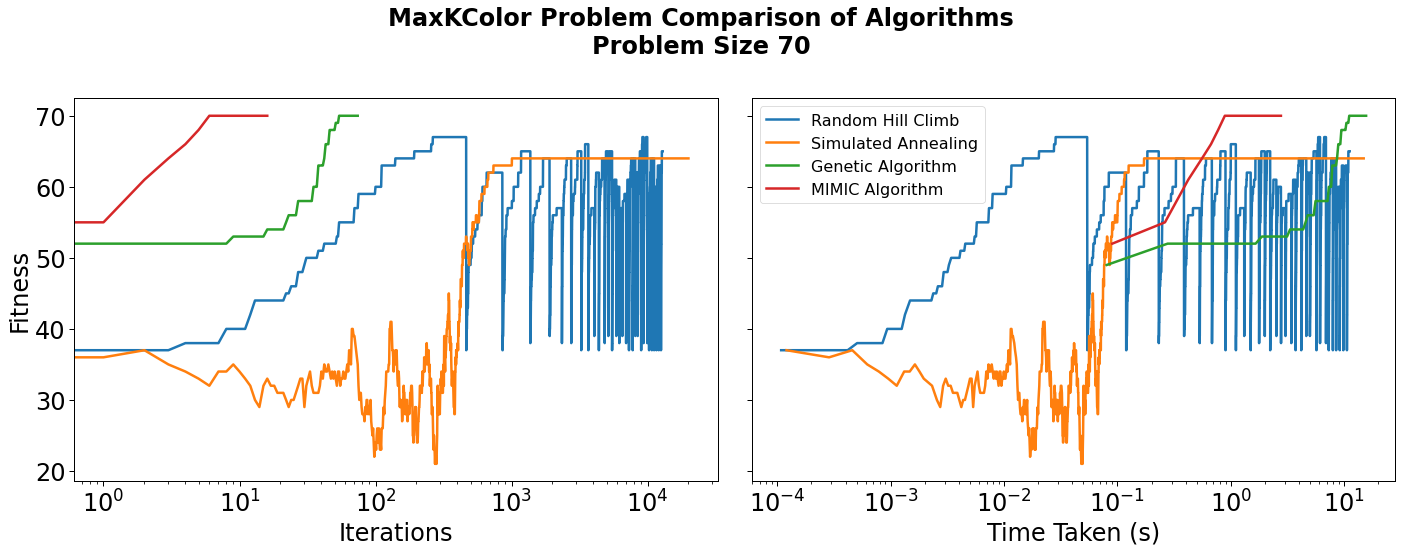

In [11]:
problem_size = 70

importlib.reload(common)
for r,l in zip(results, labels):
    index = r["problem_size"].index(problem_size)
    print("{} best fitness = {}".format(l, r["best_fitness"][index]))

# common.plot_for_problem_size_all(results, labels, PROBLEM, problem_size=problem_size, log_x=True)

common.plot_for_problem_size(results, labels, PROBLEM, y="fitness_curve", problem_size=problem_size, log_x=True)
common.plot_for_problem_size(results, labels, PROBLEM, x="call_curve", y="fitness_curve", problem_size=problem_size, log_x=True)
common.plot_for_problem_size(results, labels, PROBLEM, x="time_curve", y="fitness_curve", problem_size=problem_size, log_x=True)

common.plot_for_problem_size_all(results, labels, PROBLEM, problem_size=problem_size)
common.plot_for_problem_size_all(results, labels, PROBLEM, problem_size=problem_size, x="time_curve", log_x=[True, True])

In [6]:
# Main Problem Creation
n = 70
edges=[]

for i in range(n):
    edge = (np.random.randint(0, n), np.random.randint(0, n))
    while edge in edges or edges[::-1] in edges or edge[0]==edge[1]:
        edge = (np.random.randint(0, n), np.random.randint(0, n))
    edges.append(edge)

fitness = mlrose.MaxKColor(edges)
problem = mlrose.DiscreteOpt(length=n, fitness_fn=fitness, maximize=True, max_val=2)
problem.set_mimic_fast_mode(True)
init_state = np.random.choice([0, 1], size=(n,))


In [7]:
rhc = mlrose.RHCRunner(problem=problem,
                       experiment_name=rhc_experiment_name,
                       output_directoyr=output_directory,
                       seed=1,
                       iteration_list=[rhc_max_iters],
                       restart_list=[i for i in range(0, 120, 20)],
                       max_attempts=rhc_max_attempts)
rhc_run_stats, rhc_curves = rhc.run()
                

Running rhc
*****************
*** Run START ***
*****************
restarts:[0], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[0]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[39.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0]...

restarts:[0], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[0]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[299], done:[True], time:[0.02], fitness:[61.0000]
	[1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
restarts:[20], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[0]
runner_name:[rhc], e

restarts:[20], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[11]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[500], done:[True], time:[0.99], fitness:[58.0000]
	[0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0// 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0]...

restarts:[20], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[12]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[1.01], fitness:[37.0000]
	[1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1// 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0]...

restarts:[20], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[12]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[496], done:[True], time:[1.17], fitness:[58.0000]
	[1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0

restarts:[40], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[2]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[462], done:[True], time:[0.19], fitness:[59.0000]
	[0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0// 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1]...

restarts:[40], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[3]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[0.21], fitness:[27.0000]
	[1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0// 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1]...

restarts:[40], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[3]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[318], done:[True], time:[0.26], fitness:[59.0000]
	[1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 

restarts:[40], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[14]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[1.74], fitness:[36.0000]
	[0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1// 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1]...

restarts:[40], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[14]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[312], done:[True], time:[1.87], fitness:[59.0000]
	[0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1// 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1]...

restarts:[40], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[15]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[1.90], fitness:[38.0000]
	[1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 

restarts:[40], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[25]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[411], done:[True], time:[4.84], fitness:[57.0000]
	[1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1// 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0]...

restarts:[40], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[26]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[4.87], fitness:[38.0000]
	[1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0// 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1]...

restarts:[40], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[26]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[350], done:[True], time:[5.11], fitness:[54.0000]
	[0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0

restarts:[40], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[37]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[443], done:[True], time:[9.10], fitness:[59.0000]
	[1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1// 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0]...

restarts:[40], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[38]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[9.24], fitness:[34.0000]
	[0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0// 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1]...

restarts:[40], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[38]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[519], done:[True], time:[9.72], fitness:[58.0000]
	[0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1

restarts:[60], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[8]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[473], done:[True], time:[1.30], fitness:[59.0000]
	[1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0// 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0]...

restarts:[60], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[9]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[1.35], fitness:[29.0000]
	[0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1// 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1]...

restarts:[60], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[9]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[382], done:[True], time:[1.49], fitness:[60.0000]
	[0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 

restarts:[60], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[20]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[510], done:[True], time:[4.52], fitness:[60.0000]
	[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0// 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1]...

restarts:[60], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[21]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[4.58], fitness:[29.0000]
	[1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0// 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1]...

restarts:[60], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[21]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[557], done:[True], time:[4.91], fitness:[60.0000]
	[1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1

restarts:[60], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[32]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[365], done:[True], time:[9.06], fitness:[63.0000]
	[1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0// 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1]...

restarts:[60], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[33]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[9.12], fitness:[26.0000]
	[0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0// 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0]...

restarts:[60], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[33]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[382], done:[True], time:[9.47], fitness:[62.0000]
	[0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0

restarts:[60], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[44]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[553], done:[True], time:[14.99], fitness:[60.0000]
	[1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0// 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0]...

restarts:[60], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[45]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[15.06], fitness:[30.0000]
	[1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0// 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0]...

restarts:[60], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[45]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[416], done:[True], time:[15.54], fitness:[58.0000]
	[1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 

restarts:[60], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[56]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[403], done:[True], time:[22.73], fitness:[61.0000]
	[1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1// 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1]...

restarts:[60], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[57]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[22.81], fitness:[30.0000]
	[1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0// 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1]...

restarts:[60], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[57]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[398], done:[True], time:[23.40], fitness:[59.0000]
	[1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[7]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[1.50], fitness:[34.0000]
	[0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0// 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1]...

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[7]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[246], done:[True], time:[1.64], fitness:[54.0000]
	[0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0// 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1]...

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[8]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[1.72], fitness:[32.0000]
	[1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[18]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[367], done:[True], time:[5.15], fitness:[57.0000]
	[0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1// 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1]...

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[19]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[5.24], fitness:[42.0000]
	[0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0// 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0]...

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[19]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[431], done:[True], time:[5.52], fitness:[58.0000]
	[0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[30]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[491], done:[True], time:[10.27], fitness:[61.0000]
	[0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0// 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0]...

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[31]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[10.37], fitness:[33.0000]
	[0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0// 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1]...

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[31]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[539], done:[True], time:[10.84], fitness:[62.0000]
	[0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[42]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[319], done:[True], time:[16.81], fitness:[58.0000]
	[1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1// 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1]...

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[43]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[16.92], fitness:[33.0000]
	[0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1// 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1]...

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[43]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[353], done:[True], time:[17.45], fitness:[58.0000]
	[0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[54]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[439], done:[True], time:[25.24], fitness:[58.0000]
	[0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1// 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1]...

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[55]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[25.35], fitness:[43.0000]
	[1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1// 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0]...

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[55]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[445], done:[True], time:[25.98], fitness:[58.0000]
	[1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[66]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[371], done:[True], time:[33.80], fitness:[59.0000]
	[0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0// 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0]...

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[67]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[33.92], fitness:[35.0000]
	[0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0]...

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[67]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[334], done:[True], time:[34.53], fitness:[58.0000]
	[1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[78]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[552], done:[True], time:[44.82], fitness:[63.0000]
	[1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1// 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1]...

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[79]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[44.95], fitness:[33.0000]
	[0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1// 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1]...

restarts:[80], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[79]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[438], done:[True], time:[45.82], fitness:[58.0000]
	[0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[9]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[382], done:[True], time:[2.95], fitness:[60.0000]
	[0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1// 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1]...

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[10]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[3.08], fitness:[33.0000]
	[1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1// 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1]...

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[10]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[393], done:[True], time:[3.30], fitness:[60.0000]
	[0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[21]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[557], done:[True], time:[8.15], fitness:[60.0000]
	[1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0// 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0]...

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[22]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[8.28], fitness:[32.0000]
	[1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1// 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0]...

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[22]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[511], done:[True], time:[8.68], fitness:[58.0000]
	[1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[33]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[382], done:[True], time:[14.51], fitness:[62.0000]
	[0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1// 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0]...

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[34]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[14.65], fitness:[37.0000]
	[0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1// 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1]...

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[34]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[333], done:[True], time:[15.04], fitness:[56.0000]
	[0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[45]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[416], done:[True], time:[22.37], fitness:[58.0000]
	[1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0// 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0]...

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[46]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[22.52], fitness:[34.0000]
	[1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0// 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0]...

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[46]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[579], done:[True], time:[23.24], fitness:[59.0000]
	[1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[57]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[398], done:[True], time:[32.03], fitness:[59.0000]
	[1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1// 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1]...

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[58]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[32.18], fitness:[41.0000]
	[0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1// 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1]...

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[58]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[422], done:[True], time:[32.86], fitness:[63.0000]
	[0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[69]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[335], done:[True], time:[41.71], fitness:[61.0000]
	[0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1// 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1]...

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[70]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[41.87], fitness:[34.0000]
	[0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1// 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0]...

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[70]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[499], done:[True], time:[42.77], fitness:[60.0000]
	[0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[81]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[344], done:[True], time:[54.22], fitness:[59.0000]
	[1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0// 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0]...

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[82]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[54.38], fitness:[32.0000]
	[1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1// 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0]...

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[82]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[294], done:[True], time:[55.06], fitness:[59.0000]
	[1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[93]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[418], done:[True], time:[67.03], fitness:[60.0000]
	[1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1// 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0]...

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[94]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[67.20], fitness:[31.0000]
	[0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0// 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0]...

restarts:[100], max_iters:[100000], output_directoyr:[MaxKColor], current_restart:[94]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[201], iteration:[406], done:[True], time:[68.22], fitness:[64.0000]
	[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0

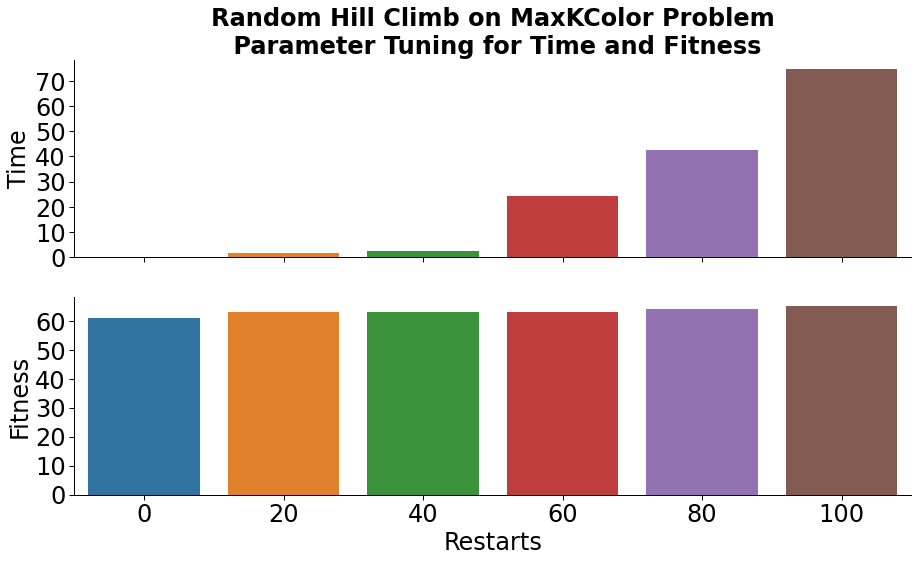

In [8]:
best_rhc_run_stats = common.get_best_runs_from_runner(rhc_run_stats, ['Restarts'])
common.plot_runner_results_both_1param(best_rhc_run_stats, RHC_ALGO, PROBLEM, param1='Restarts')

In [9]:
decay_list = [0.001, 0.005, 0.01, 0.05, 0.1]
sa = mlrose.SARunner(problem=problem,
              experiment_name=sa_experiment_name,
              output_directory=output_directory,
              seed=1,
              iteration_list=[sa_max_iters],
              max_attempts=sa_max_attempts,
              decay_list = decay_list,
              temperature_list=[10, 50, 100, 500, 1000])

sa_run_stats, sa_curves = sa.run()


Running sa
*****************
*** Run START ***
*****************
schedule:[10], max_iters:[100000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[39.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0]...

schedule:[10], max_iters:[100000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[3], iteration:[100000], done:[True], time:[204.16], fitness:[64.0000]
	[1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0// 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[10], max_iters:[100000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[39.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1

schedule:[100], max_iters:[100000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[4], iteration:[100000], done:[True], time:[338.43], fitness:[69.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0// 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[100], max_iters:[100000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[39.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0]...

schedule:[100], max_iters:[100000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[13], iteration:[100000], done:[True], time:[341.09], fitness:[69.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1// 1 0 1 1 1 0 1 

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[1000], max_iters:[100000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[39.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0]...

schedule:[1000], max_iters:[100000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[11], iteration:[100000], done:[True], time:[365.01], fitness:[67.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1// 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[1000], max_iters:[100000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[39

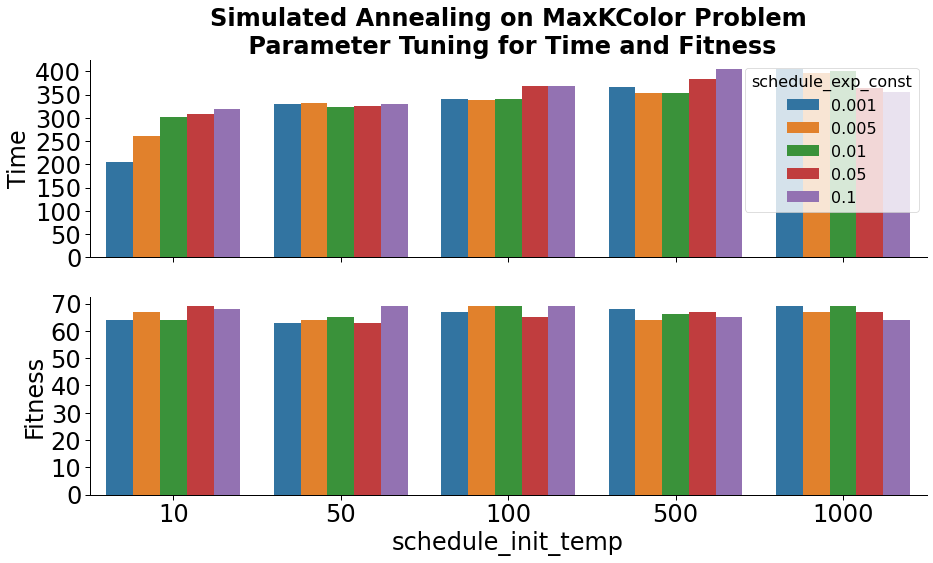

In [10]:
best_sa_run_stats = common.get_best_runs_from_runner(sa_run_stats, ['schedule_init_temp', 'schedule_exp_const'])
common.plot_runner_results_both(best_sa_run_stats, SA_ALGO, PROBLEM, param1='schedule_init_temp', param2='schedule_exp_const')

In [11]:
ga = mlrose.GARunner(problem=problem,
              experiment_name=ga_experiment_name,
              output_directory=output_directory,
              seed=1,
              iteration_list=[ga_max_iters],
              max_attempts=ga_max_attempts,
              population_sizes=[100, 500, 1000, 5000, 10000],
              mutation_rates=[0.05, 0.1, 0.5])

ga_run_stats, ga_curves = ga.run()

Running ga
*****************
*** Run START ***
*****************
pop_size:[100], mutation_prob:[0.05], max_iters:[10000]
runner_name:[ga], experiment_name:[Genetic_Algorithm], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[39.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0]...

pop_size:[100], mutation_prob:[0.05], max_iters:[10000]
runner_name:[ga], experiment_name:[Genetic_Algorithm], attempt:[21], iteration:[71], done:[True], time:[0.63], fitness:[63.0000]
	[0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0// 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[100], mutation_prob:[0.1], max_iters:[10000]
runner_name:[ga], experiment_name:[Genetic_Algorithm], attempt:[0], iteration:[0], done:[False], time:[0.01], f

pop_size:[5000], mutation_prob:[0.5], max_iters:[10000]
runner_name:[ga], experiment_name:[Genetic_Algorithm], attempt:[21], iteration:[27], done:[True], time:[16.44], fitness:[57.0000]
	[0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0// 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[10000], mutation_prob:[0.05], max_iters:[10000]
runner_name:[ga], experiment_name:[Genetic_Algorithm], attempt:[0], iteration:[0], done:[False], time:[0.37], fitness:[39.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0]...

pop_size:[10000], mutation_prob:[0.05], max_iters:[10000]
runner_name:[ga], experiment_name:[Genetic_Algorithm], attempt:[21], iteration:[78], done:[True], time:[113.92], fitness:[69.0000]
	[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0

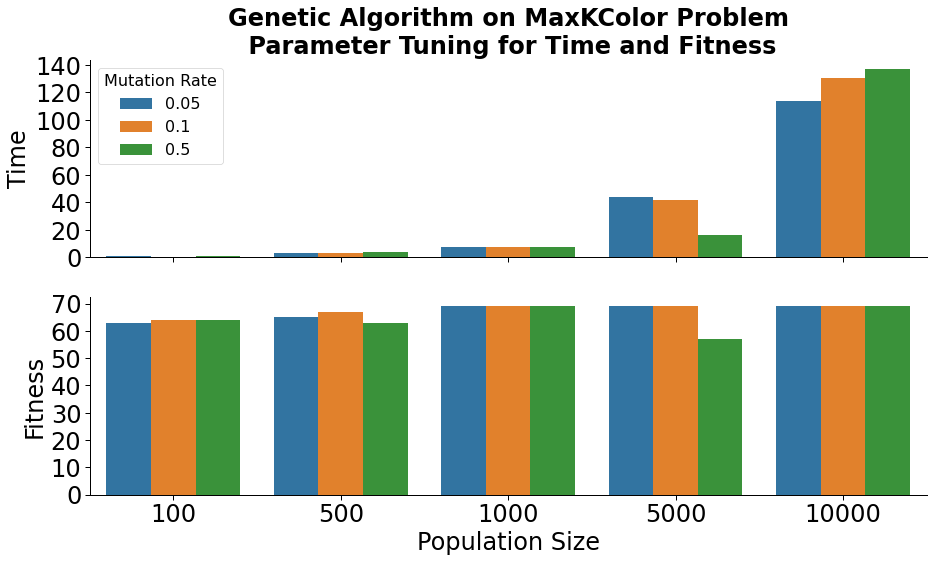

In [12]:
best_ga_run_stats = common.get_best_runs_from_runner(ga_run_stats, ['Population Size','Mutation Rate'])
common.plot_runner_results_both(best_ga_run_stats, GA_ALGO, PROBLEM, param1='Population Size', param2='Mutation Rate')

In [13]:
mimic = mlrose.MIMICRunner(problem=problem,
              experiment_name=mimic_experiment_name,
              output_directory=output_directory,
              seed=1,
              iteration_list=[mimic_max_iters],
              max_attempts=mimic_max_attempts,
              population_sizes=[100, 500, 1000, 5000, 10000],
              keep_percent_list=[0.05, 0.1, 0.2, 0.5, 0.8])

mimic_run_stats, mimic_curves = mimic.run()

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[100], keep_pct:[0.05], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[39.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0]...

use_fast_mimic:[False], pop_size:[100], keep_pct:[0.05], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], attempt:[11], iteration:[11], done:[True], time:[15.97], fitness:[51.0000]
	[1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.// 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.// 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. ...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[100], keep_pct:[0.1], max_iters

use_fast_mimic:[False], pop_size:[500], keep_pct:[0.8], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], attempt:[11], iteration:[12], done:[True], time:[19.19], fitness:[50.0000]
	[0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.// 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.// 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. ...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[1000], keep_pct:[0.05], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], attempt:[0], iteration:[0], done:[False], time:[0.04], fitness:[39.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0]...

use_fast_mimic:[False], pop_size:[1000], keep_pct:[0.05], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], a

use_fast_mimic:[False], pop_size:[5000], keep_pct:[0.8], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], attempt:[11], iteration:[42], done:[True], time:[102.55], fitness:[69.0000]
	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. ...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[10000], keep_pct:[0.05], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], attempt:[0], iteration:[0], done:[False], time:[0.35], fitness:[39.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0]...

use_fast_mimic:[False], pop_size:[10000], keep_pct:[0.05], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm

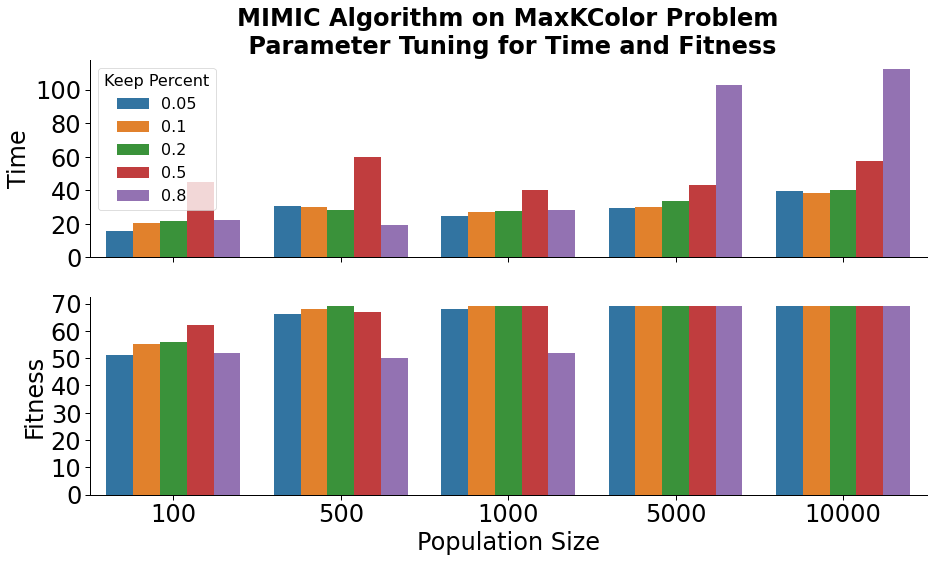

In [14]:
best_mimic_run_stats = common.get_best_runs_from_runner(mimic_run_stats, ['Population Size','Keep Percent'])
common.plot_runner_results_both(best_mimic_run_stats, MIMIC_ALGO, PROBLEM, param1='Population Size', param2='Keep Percent', legend_loc="upper left")